<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [4]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats as scst
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [8]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 1: Become familiar with the dataset


Task 1: Become familiar with the dataset The following describes the dataset variables:

· CRIM - per capita crime rate by town

· ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

· INDUS - proportion of non-retail business acres per town.

· CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

· NOX - nitric oxides concentration (parts per 10 million)

· RM - average number of rooms per dwelling

· AGE - proportion of owner-occupied units built prior to 1940

· DIS - weighted distances to five Boston employment centres

· RAD - index of accessibility to radial highways

· TAX - full-value property-tax rate per $10,000

· PTRATIO - pupil-teacher ratio by town

· LSTAT - % lower status of the population

· MEDV - Median value of owner-occupied homes in $1000's

In [5]:
boston_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
boston_df.shape

(506, 14)

#### Task 2: Generate Descriptive Statistics and Visualizations

Generate the following and explain your findings:

For the "Median value of owner-occupied homes" provide a boxplot
Provide a bar plot for the Charles river variable
Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
Create a histogram for the pupil to teacher ratio variable

#### For the "Median value of owner-occupied homes" provide a boxplot

Text(0.5, 1.0, 'Median value of owner-occupied homes in $1000s')

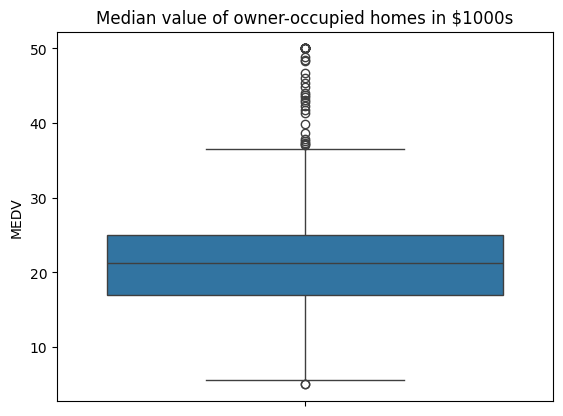

In [15]:
fig = sns.boxplot(y = 'MEDV', data = boston_df)
fig.set_title('Median value of owner-occupied homes in $1000s')

#### Provide a bar plot for the Charles river variable

Text(0.5, 1.0, 'Number of Properties bounding and not bounding the Charles River')

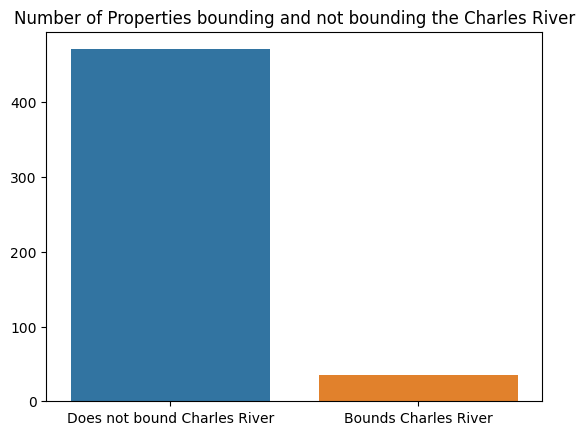

In [14]:
x_var= ["Does not bound Charles River","Bounds Charles River"]
y_var=[(boston_df.CHAS==0).sum(),(boston_df.CHAS==1).sum()]
fig = sns.barplot(x=x_var, y=y_var,hue=x_var, legend=False)
fig.set_title('Number of Properties bounding and not bounding the Charles River')

#### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

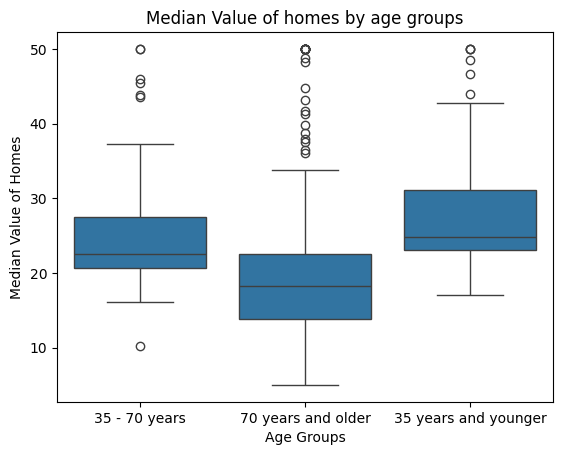

In [21]:
boston_df.loc[(boston_df.AGE >= 70), 'age_group'] = '70 years and older'
boston_df.loc[((boston_df.AGE > 35)&(boston_df.AGE < 70)), 'age_group'] = '35 - 70 years'
boston_df.loc[(boston_df.AGE <= 35), 'age_group'] = '35 years and younger'

fig = sns.boxplot(x='age_group', y='MEDV', data=boston_df)
fig.set_title("Median Value of homes by age groups")
pyplot.xlabel("Age Groups");
pyplot.ylabel("Median Value of Homes");

#### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

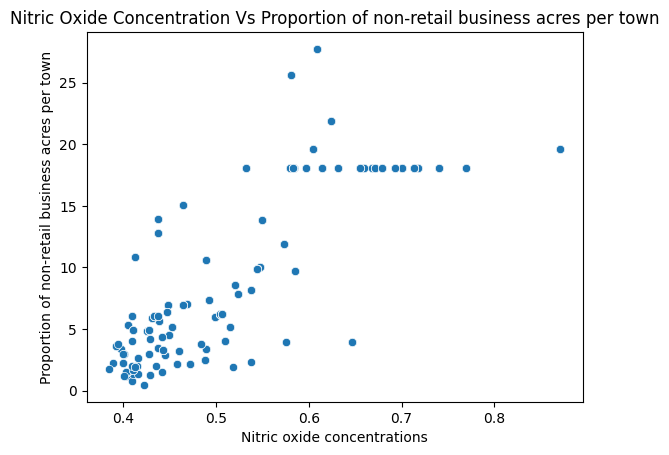

In [27]:
fig = sns.scatterplot(data = boston_df, x = 'NOX', y = 'INDUS')

fig.set_title("Nitric Oxide Concentration Vs Proportion of non-retail business acres per town")
pyplot.xlabel("Nitric oxide concentrations");
pyplot.ylabel("Proportion of non-retail business acres per town");

The nitric oxide concentration shows a linear relationship with the proportion of non-retail business acres per town, up until about the 0.6 (parts per 10 million) mark. Following this, the nitric oxide concentrations do not impact the proportion of non-retial businees acres per town (flat trendline). 

#### Create a histogram for the pupil to teacher ratio variable

Text(0.5, 1.0, 'Pupil to teacher ratio per town')

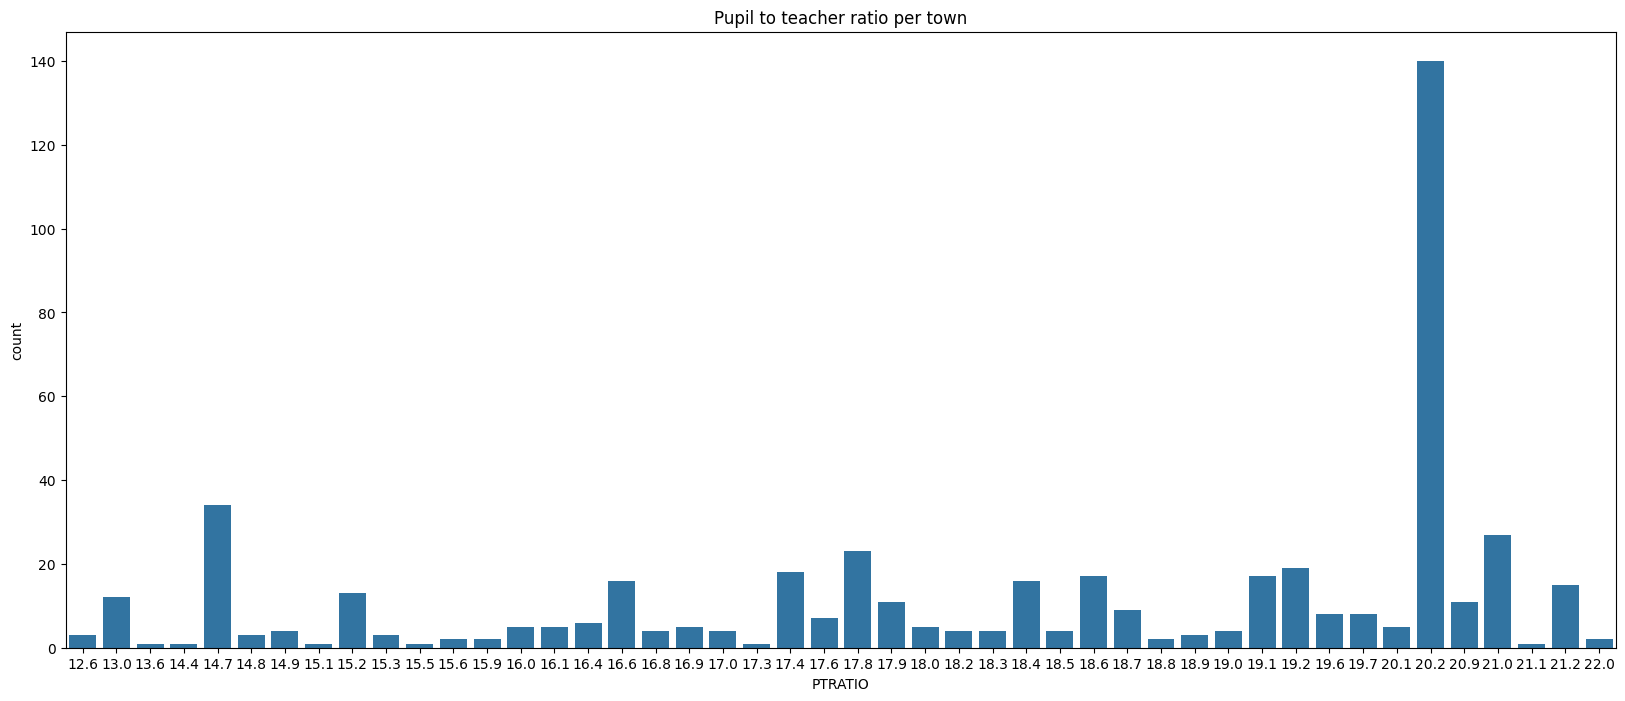

In [30]:
pyplot.figure(figsize=(20, 8))
fig = sns.countplot(x = 'PTRATIO', data = boston_df)
fig.set_title('Pupil to teacher ratio per town')

#### Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

- Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

- Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

- Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

- What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

#### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

In [9]:
scst.ttest_ind(boston_df[boston_df.CHAS == 1].MEDV,boston_df[boston_df.CHAS == 0].MEDV)


TtestResult(statistic=3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

Since the p-value is less than 0.05 (alpha), the Null Hypothesis can be rejecetd. This implies that there is no statistical difference in median value between houses bounded by the Charles River and houses not bounded.

#### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

In [11]:
boston_df.loc[(boston_df.AGE > 81), 'age'] = 'prior to 1940'
boston_df.loc[(boston_df.AGE <= 81), 'age'] = 'post 1940'

scst.levene(boston_df[boston_df.age=='prior to 1940']['MEDV'],boston_df[boston_df.age=='post 1940']['MEDV'],center='mean')


LeveneResult(statistic=1.587082228964923, pvalue=0.2083265383143275)

Since the p-value here is greater than 0.05 (alpha), we can conclude that there is a statistical difference in median values of houses for each proportion of owner occupied units built prior to 1940.

#### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

In [13]:
x = boston_df["NOX"]
y = boston_df["INDUS"]
scst.pearsonr(x, y)

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

The Pearson Correlation coefficient (0.76) shows a strong positive linear relationship between the Nitric oxide concentrations and proportion of non-retail business acres per town.

The p-value is less than 0.05 (alpha) which means that this correlation is statistically significant.

#### What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [15]:
x = boston_df['DIS']
y = boston_df['MEDV']

x = sm.add_constant(x) 

model = sm.OLS(y, x).fit()

predictions = model.predict(x)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 26 Jun 2024   Prob (F-statistic):           1.21e-08
Time:                        13:53:32   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The additional weighted distance to the five Boston employment centres does show an impact on the median value of owner occupied homes, based on the R-squared value.